## Error Estimation

- How to estimate error for non-Gaussian distribution
- p-value distribution

In [1]:
import sys,os
import pandas as pd
import numpy as np

from scipy import stats
import math

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## Generate exponentially-distributed data

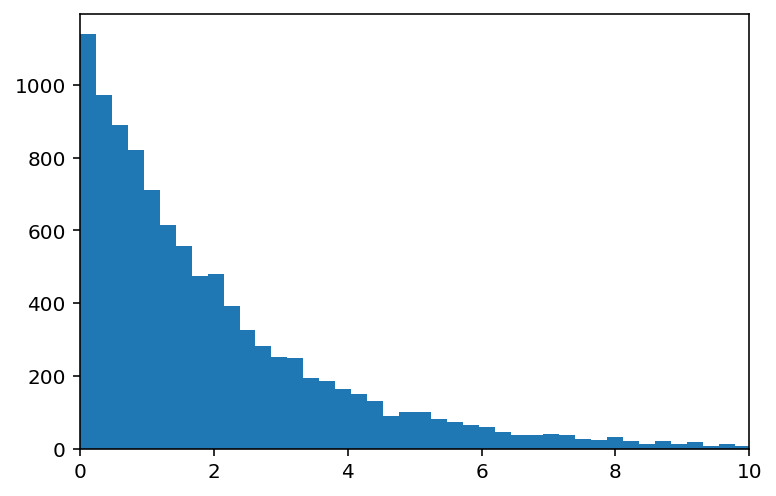

In [2]:
# Generate exponentially-distributed data
yy = np.random.exponential(scale=2.0, size=10**4)

plt.rcParams["figure.figsize"] = (8, 4) # (width, height)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(yy,bins=100)
ax.set_xlim(left=0,right=10)
plt.show();

In [3]:
# Calculate mean and standard error
mean1 = yy.sum()/len(yy)
mean2 = np.mean(yy)
std1  = np.sqrt(np.square(np.subtract(yy,mean1)).mean())
std2  = np.std(yy)
print(f"mean1 = {mean1:.4f}")
print(f"mean2 = {mean2:.4f}")
print(f"std1  = {std1:.4f}")
print(f"std2  = {std2:.4f}")

mean1 = 1.9841
mean2 = 1.9841
std1  = 1.9903
std2  = 1.9903


### Let's use CLT (Central Limit Theorem) to estimate the error.

We simply generate N1 groups of N2 points

np.sqrt(N2)*std_means = 2.0691
np.sqrt(N2)*std_means = 2.0265
np.sqrt(N2)*std_means = 2.0117
np.sqrt(N2)*std_means = 2.1152
np.sqrt(N2)*std_means = 2.0593
np.sqrt(N2)*std_means = 2.0357
np.sqrt(N2)*std_means = 2.0239
np.sqrt(N2)*std_means = 2.0040
np.sqrt(N2)*std_means = 2.0424
np.sqrt(N2)*std_means = 1.8858


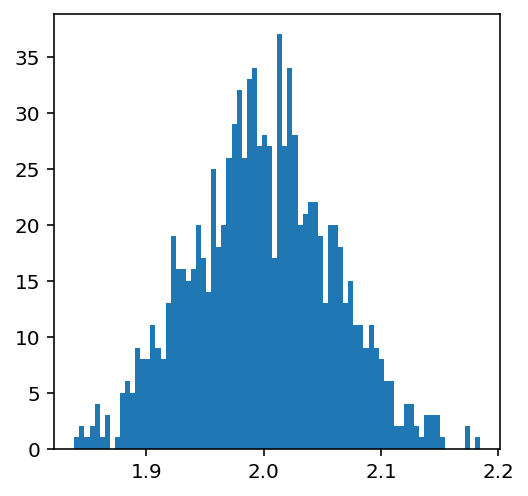

In [4]:
# Using CLT to convert to Normal distribution to estimate the error
# Split N points into N1 groups of N2 points
# Calculate mean for each group
# Estimate error of distribution of means
# Multiply by sqrt(group_size)

N1 = 1000   # N groups
N2 = 1000   # N points in each group
N  = N1*N2 # N = total number of points

for trial in range(10):
    means = []
    for ii in range(N1):
        yy = np.random.exponential(scale=2.0, size=N2)
        means.append(np.mean(yy))

    std_means = np.std(means)
    print(f"np.sqrt(N2)*std_means = {np.sqrt(N2)*std_means:.4f}")
    
plt.rcParams["figure.figsize"] = (4, 4) # (width, height)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(means, bins=80)
plt.show();

### Again using CLT - but this time doing Bootrstrap

(selecting points with replacement)

np.sqrt(N2)*std_means = 1.9648
np.sqrt(N2)*std_means = 1.8970
np.sqrt(N2)*std_means = 1.9590
np.sqrt(N2)*std_means = 2.0336
np.sqrt(N2)*std_means = 1.9726
np.sqrt(N2)*std_means = 1.9267
np.sqrt(N2)*std_means = 1.9845
np.sqrt(N2)*std_means = 1.9622
np.sqrt(N2)*std_means = 1.9594
np.sqrt(N2)*std_means = 2.0175


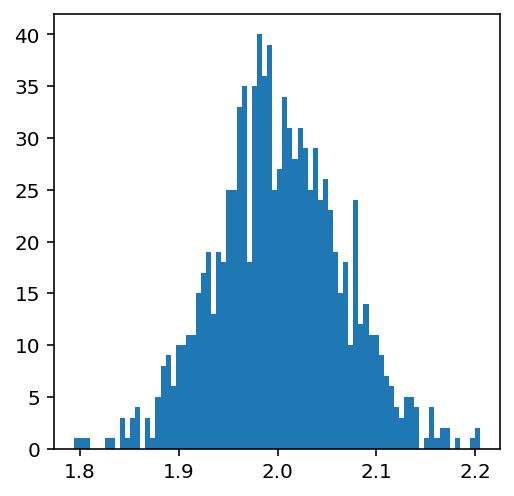

In [5]:
# Using CLT to convert to Normal distribution to estimate the error
# Bootstrap N1 groups of N2 points out of all data points
# Calculate mean for each group
# Estimate error of distribution of means
# Multiply by  sqrt(N2)
N_data = 10**6
data = np.random.exponential(scale=2.0, size=N_data)

N1 = 1000 # N groups
N2 = 1000 # N points in each group
for trial in range(10):
    means = []
    for ii in range(N1):
        yy = np.random.choice(data, replace=True, size=N1)
        means.append(np.mean(yy))

    std_means = np.std(means)
    print(f"np.sqrt(N2)*std_means = {np.sqrt(N2)*std_means:.4f}")
    
plt.rcParams["figure.figsize"] = (4, 4) # (width, height)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(means, bins=80)
plt.show();

## Trying t-Test on non-Gaussian distributions (exponential)

Suppose we have two data sets A & B
with same number of points.
 
Let's try to do a t-test between them
<br>and compare it to the t-test between two distributions of mean values
<br>(which have Normal distribution because of CLT)

In [6]:
# create functions

# ------------------------------------------------
def independent_ttest(data1, data2, alpha=0.05):
    """ 
    # calculate t-test for two independent variables 
    # data1 & data2 are of type list or np.array.
    # They may be of different length.
    
    """
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate std_err of the mean (which is std_dev/sqrt(n))
    sem1, sem2 = stats.sem(data1), stats.sem(data2) # ScyPy
    # standard error on the difference between the samples
    sed = np.sqrt(sem1**2.0 + sem2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value - a point on test distribution
    # that is compared to the test statistic 
    # to determine whether to reject the null hypothesis. 
    # You reject null hypothesis when abs(t_stat) > cv
    crit_val = stats.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p_val = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, crit_val, p_val

# ------------------------------------------------
def print_results(t_stat, df, crit_val, p_val, alpha):
    print("-"*40)
    print(f"t_stat       = {t_stat:.4f}")
    print(f"degr.freedom = {df}")
    print(f"crit_val     = {crit_val:.4f}")
    print(f"p_val        = {p_val:.4f}")
    print("\nNull Hypothesis: two means are equal")
    print("reject if abs(t_stat) > crit_val :", end="")
    if abs(t_stat) > crit_val:
        print("  Reject")
    else:
        print("  Accept")
    print("reject if p_val      <= alpha    :", end="")
    if p_val < alpha:
        print("  Reject")
    else:
        print("  Accept")

# ------------------------------------------------
def make_data_means(mydata,N1=1000,N2=1000):
    means = []
    for ii in range(N1):
        yy = np.random.choice(mydata, replace=True, size=N2)
        means.append(np.mean(yy))
    return means

In [7]:
# OK, generate data and means - and compare

data1 = np.random.exponential(scale=2.0, size=10**6)
means1=make_data_means(data1,N1=1000,N2=1000)
data2 = np.random.exponential(scale=2.005, size=10**6)
means2=make_data_means(data2,N1=1000,N2=1000)

print(f"data1 : {np.mean(data1):.4f} +/- {np.std(data1):.4f}")
print(f"data2 : {np.mean(data2):.4f} +/- {np.std(data2):.4f}")
print(f"means1: {np.mean(means1):.4f} +/- {np.sqrt(N2)*np.std(means1):.4f}")
print(f"means2: {np.mean(means2):.4f} +/- {np.sqrt(N2)*np.std(means2):.4f}")

alpha = 0.05
print("\ndata1, data2")
t_stat, df, crit_val, p_val = independent_ttest(data1, data2, alpha=alpha)
print_results(t_stat, df, crit_val, p_val, alpha)
print("\nmeans1, means2")
t_stat, df, crit_val, p_val = independent_ttest(means1, means2, alpha=alpha)
print_results(t_stat, df, crit_val, p_val, alpha)

data1 : 2.0023 +/- 2.0018
data2 : 2.0070 +/- 2.0070
means1: 2.0031 +/- 2.0587
means2: 2.0066 +/- 1.9793

data1, data2
----------------------------------------
t_stat       = -1.6403
degr.freedom = 1999998
crit_val     = 1.6449
p_val        = 0.1010

Null Hypothesis: two means are equal
reject if abs(t_stat) > crit_val :  Accept
reject if p_val      <= alpha    :  Accept

means1, means2
----------------------------------------
t_stat       = -1.2490
degr.freedom = 1998
crit_val     = 1.6456
p_val        = 0.2118

Null Hypothesis: two means are equal
reject if abs(t_stat) > crit_val :  Accept
reject if p_val      <= alpha    :  Accept


### ----------------------------------------------------------
### As you run the above code multiple times, you can see how p_value for means changes between runs.

It may become very different from p_value for data
arrays - and can negate the results of the t-test!

Let's repeat this experiment 200 times and plot histograms of p-values for both methods: data & means. 

Let's do it for two cases - when distributions are identical - or strongly shifted.

In [8]:
%%time
N1 = 1000
N2 = 1000

p_vals_data_12  = []
p_vals_data_12s = []

p_vals_means_12  = []
p_vals_means_12s = []

for ii in range(200):
    myend = "\n" if ii % 10 == 9 else ""
    print(ii, " ", end=myend)
    data1 = np.random.exponential(scale=2.0, size=N1*N2)
    data2 = np.random.exponential(scale=2.0, size=N1*N2)
    data2s = 2.0 + data2

    means1  = make_data_means(data1, N1=N1, N2=N2)
    means2  = make_data_means(data2, N1=N1, N2=N2)
    means2s = make_data_means(data2s,N1=N1, N2=N2)
    alpha = 0.05

    t_stat_d12, df, crit_val_d12, p_val_d12 = independent_ttest(data1, data2, alpha=alpha)
    p_vals_data_12.append(p_val_d12)

    t_stat_d12s, df, crit_val_d12s, p_val_d12s = independent_ttest(data1, data2s, alpha=alpha)
    p_vals_data_12s.append(p_val_d12s)
    
    t_stat_m12, df, crit_val_m12, p_val_m12 = independent_ttest(means1, means2, alpha=alpha)
    p_vals_means_12.append(p_val_m12)

    t_stat_m12s, df, crit_val_m12s, p_val_m12s = independent_ttest(means1, means2s, alpha=alpha)
    p_vals_means_12s.append(p_val_m12s)    

0  1  2  3  4  5  6  7  8  9  
10  11  12  13  14  15  16  17  18  19  
20  21  22  23  24  25  26  27  28  29  
30  31  32  33  34  35  36  37  38  39  
40  41  42  43  44  45  46  47  48  49  
50  51  52  53  54  55  56  57  58  59  
60  61  62  63  64  65  66  67  68  69  
70  71  72  73  74  75  76  77  78  79  
80  81  82  83  84  85  86  87  88  89  
90  91  92  93  94  95  96  97  98  99  
100  101  102  103  104  105  106  107  108  109  
110  111  112  113  114  115  116  117  118  119  
120  121  122  123  124  125  126  127  128  129  
130  131  132  133  134  135  136  137  138  139  
140  141  142  143  144  145  146  147  148  149  
150  151  152  153  154  155  156  157  158  159  
160  161  162  163  164  165  166  167  168  169  
170  171  172  173  174  175  176  177  178  179  
180  181  182  183  184  185  186  187  188  189  
190  191  192  193  194  195  196  197  198  199  
CPU times: user 24.3 s, sys: 209 ms, total: 24.5 s
Wall time: 24.4 s


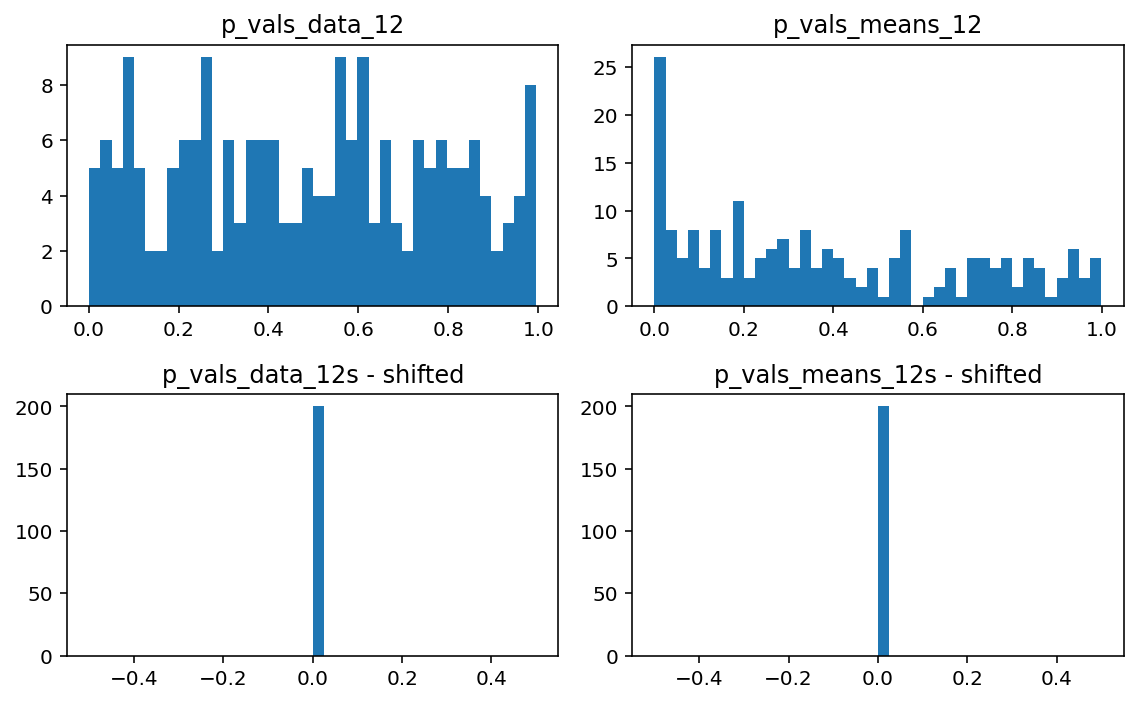

In [9]:
# plot the results of calculations above
plt.rcParams["figure.figsize"] = (8, 5) # (width, height)
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()
_ = ax0.hist(p_vals_data_12,bins=40)
_ = ax0.set_title('p_vals_data_12')

_ = ax1.hist(p_vals_means_12,bins=40)
_ = ax1.set_title('p_vals_means_12')

_ = ax2.hist(p_vals_data_12s,bins=40)
_ = ax2.set_title('p_vals_data_12s - shifted')

_ = ax3.hist(p_vals_means_12s,bins=40)
_ = ax3.set_title('p_vals_means_12s - shifted')
_ = fig.tight_layout()
_ = plt.show();

### -----------------------------------------------------------
### Hmm, when the distributions are shifted significantly, P-val is zero, but not for "means"

Let's try the same for normal distribution

In [10]:
# stats.sem?

means: 0.00, 3.00
sem: 0.0010, 0.0010
sed: 0.0014
-2120.0090428927692


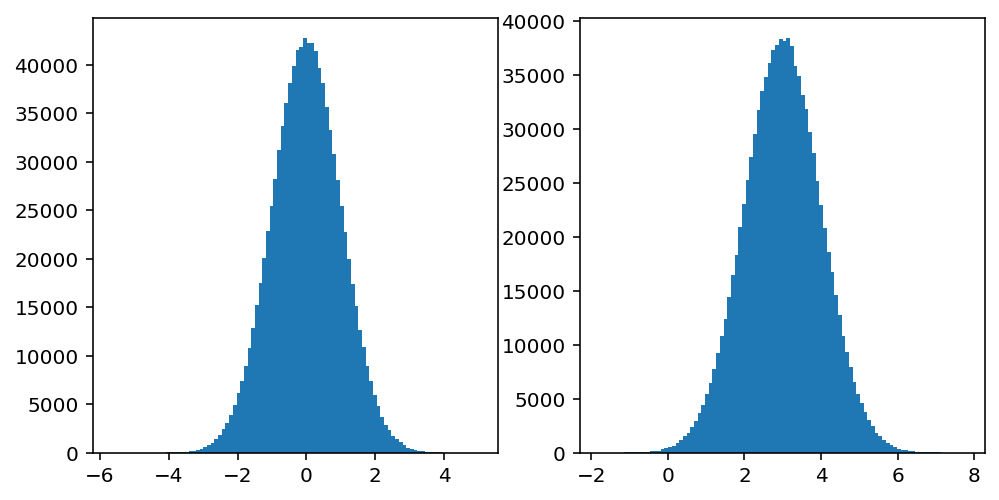

In [11]:
data1 = np.random.randn(1000000)
data2 = 3 + np.random.randn(1000000)
mean1 = np.mean(data1)
mean2 = np.mean(data2)
print(f"means: {mean1:.2f}, {mean2:.2f}")
sem1 = stats.sem(data1)
sem2 = stats.sem(data2) # ScyPy
print(f"sem: {sem1:.4f}, {sem2:.4f}")

sed = np.sqrt(sem1**2.0 + sem2**2.0)
print(f"sed: {sed:.4f}")
t_stat = (mean1 - mean2) / sed
print(t_stat)

plt.rcParams["figure.figsize"] = (8, 4) # (width, height)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(data1,bins=100)
ax2.hist(data2,bins=100)
plt.show();

In [12]:
%%time
N1 = 200
N2 = 200

p_vals_data_12  = []
t_stat_data_12  = []
p_vals_data_12s = []

p_vals_means_12  = []
t_stat_means_12  = []
p_vals_means_12s = []

for ii in range(3000):
    if 1 < ii and ii % 100 == 99:
        myend = "\n" if ii % 1000 == 999 else ""
        print(ii, " ", end=myend)
    data1 = np.random.randn(N1*N2)
    data2 = np.random.randn(N1*N2)
    data2s = 2.0 + data2

    means1  = make_data_means(data1, N1=N1, N2=N2)
    means2  = make_data_means(data2, N1=N1, N2=N2)
    means2s = make_data_means(data2s,N1=N1, N2=N2)
    alpha = 0.05

    t_stat_d12, df, crit_val_d12, p_val_d12 = independent_ttest(data1, data2, alpha=alpha)
    p_vals_data_12.append(p_val_d12)
    t_stat_data_12.append(t_stat_d12)

    t_stat_d12s, df, crit_val_d12s, p_val_d12s = independent_ttest(data1, data2s, alpha=alpha)
    p_vals_data_12s.append(p_val_d12s)
    
    t_stat_m12, df, crit_val_m12, p_val_m12 = independent_ttest(means1, means2, alpha=alpha)
    p_vals_means_12.append(p_val_m12)
    t_stat_means_12.append(t_stat_m12)

    t_stat_m12s, df, crit_val_m12s, p_val_m12s = independent_ttest(means1, means2s, alpha=alpha)
    p_vals_means_12s.append(p_val_m12s)   

99  199  299  399  499  599  699  799  899  999  
1099  1199  1299  1399  1499  1599  1699  1799  1899  1999  
2099  2199  2299  2399  2499  2599  2699  2799  2899  2999  
CPU times: user 49.2 s, sys: 470 ms, total: 49.6 s
Wall time: 49.5 s


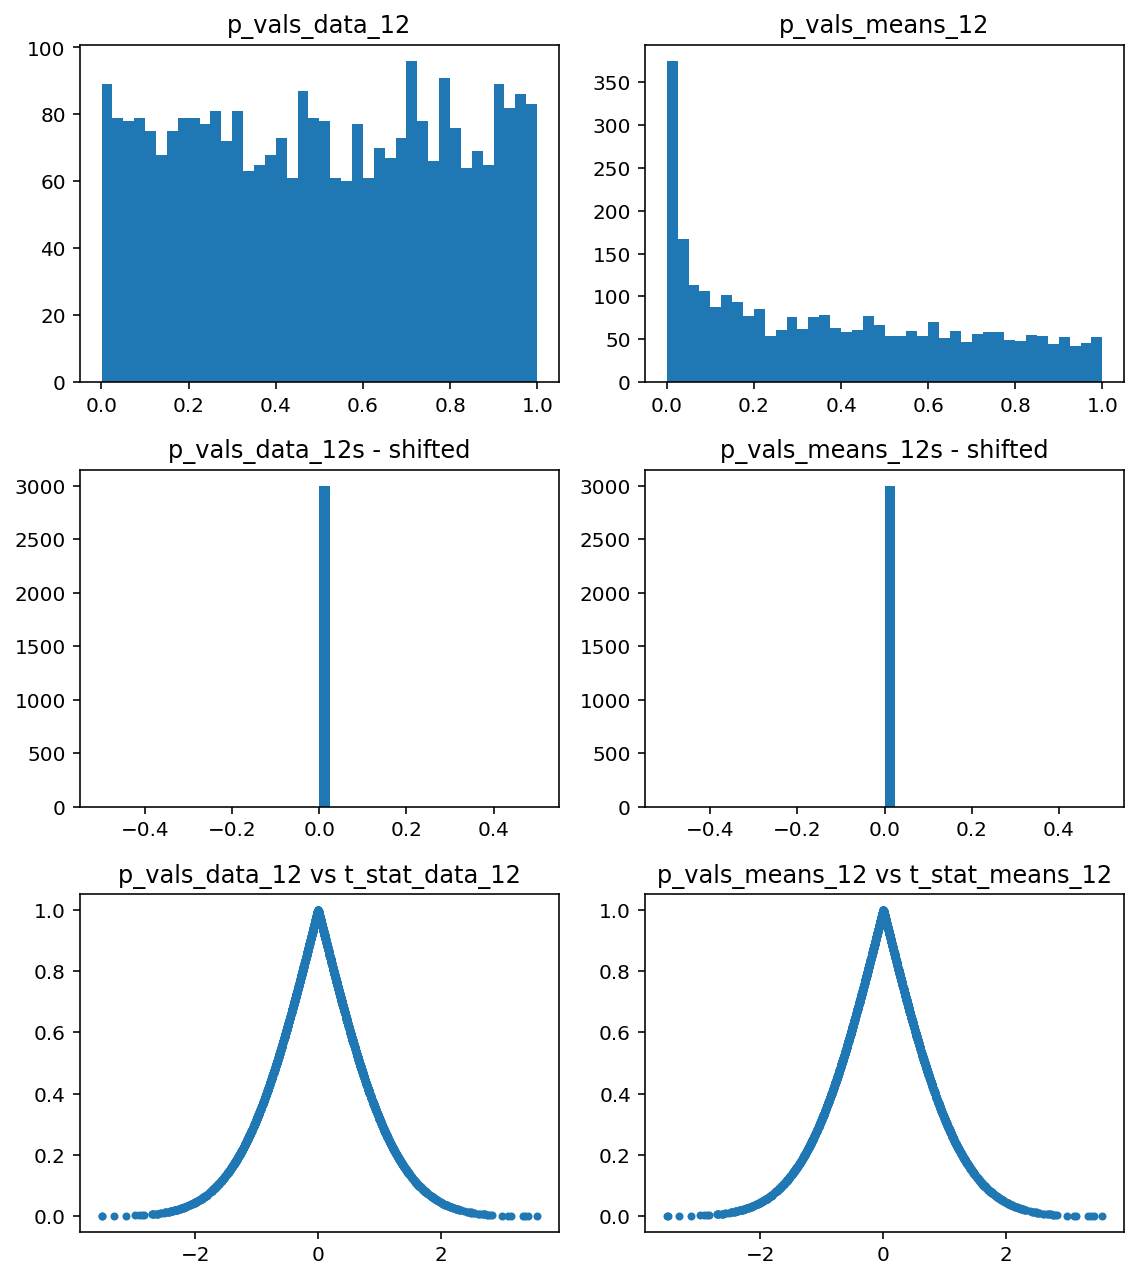

In [13]:
# plot the results of calculations above
plt.rcParams["figure.figsize"] = (8, 9) # (width, height)
fig, axes = plt.subplots(nrows=3, ncols=2)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
_ = ax0.hist(p_vals_data_12,bins=40)
_ = ax0.set_title('p_vals_data_12')

_ = ax1.hist(p_vals_means_12,bins=40)
_ = ax1.set_title('p_vals_means_12')

_ = ax2.hist(p_vals_data_12s,bins=40)
_ = ax2.set_title('p_vals_data_12s - shifted')

_ = ax3.hist(p_vals_means_12s,bins=40)
_ = ax3.set_title('p_vals_means_12s - shifted')

_ = ax4.scatter(t_stat_data_12, p_vals_data_12, marker='.')
_ = ax4.set_title('p_vals_data_12 vs t_stat_data_12')

_ = ax5.scatter(t_stat_data_12, p_vals_data_12, marker='.')
_ = ax5.set_title('p_vals_means_12 vs t_stat_means_12')

_ = fig.tight_layout()
_ = plt.show();

In [14]:
myhist = np.histogram(p_vals_data_12, bins=40, range=(0.0, 1.0))[0]
print(myhist)
mylen = len(myhist); print(mylen)
mysum = sum(myhist); print(mysum)
print(f"bin0/total = {(myhist[0]/mysum):.4f}")

[88 80 77 79 74 70 75 79 79 76 81 73 80 64 65 67 74 61 87 79 78 61 60 77
 62 69 68 73 96 79 66 89 76 64 70 64 90 82 86 82]
40
3000
bin0/total = 0.0293
